In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# load the original data 
data = np.load('data.npy')
data.shape, 

In [26]:
# take the trial average 
data_ave = np.mean(data, axis=1)

In [28]:
data_ave.shape

(399, 2430)

In [36]:
neuron_delete_ind = []
for i_neuron in range(399):
    s = np.sum(data[i_neuron,:])
    if s < 81:
        neuron_delete_ind.append(i_neuron)

In [37]:
len(neuron_delete_ind)

15

In [40]:
np.save('neuron_delete_ind_2415', neuron_delete_ind)

In [42]:
data_ave_cleared = np.delete(data_ave, neuron_delete_ind, 0)

In [43]:
data_ave_cleared.shape

(384, 2430)

In [44]:
# z-score the data 
data_zscored = 0*data_ave_cleared
for i_neuron in range(data_ave_cleared.shape[0]):
    data_zscored[i_neuron,:] = stats.zscore(data_ave_cleared[i_neuron,:])

In [45]:
data_zscored.shape

(384, 2430)

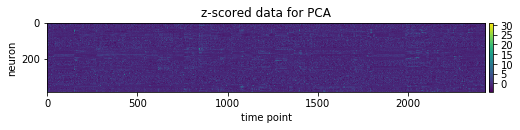

In [62]:
plt.figure(figsize=(8,5))
ax = plt.gca()
im = ax.imshow(data_zscored)
plt.xlabel('time point')
plt.ylabel('neuron')
plt.title('z-scored data for PCA')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.05)
plt.colorbar(im, cax=cax)


In [63]:
np.save('data_zscored', data_zscored)